In [1]:
import pandas as pd
import os

train_df=pd.read_json("train.json")
test_df=pd.read_json("test.json")
val_df=pd.read_json("val.json")

In [2]:
train_df.head()



,id,summary,dialogue
0,13818513,Amanda baked cookies and will bring Jerry some...,Amanda: I baked cookies. Do you want some?\r\...
1,13728867,Olivia and Olivier are voting for liberals in ...,Olivia: Who are you voting for in this electio...
2,13681000,Kim may try the pomodoro technique recommended...,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa..."
3,13730747,Edward thinks he is in love with Bella. Rachel...,"Edward: Rachel, I think I'm in ove with Bella...."
4,13728094,"Sam is confused, because he overheard Rick com...",Sam: hey overheard rick say something\r\nSam:...


In [2]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metad

In [2]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/b8/ad/3398312096118c4e62a5827664e52a04d5068e84d04142dd4a0da8a567ae/regex-2023.10.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 503.7 kB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   ------------------------- -------------- 174.1/269.6 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 269.6/269.6 kB 5.5 MB/s eta 0:00:00
Using cached

In [2]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 991.0 kB/s eta 0:00:10
   - -------------------------------------- 0.2/9.2 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.2 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.2 MB 5.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.2 MB 7.6 MB/s eta 0:00:01
   ----------- ---------------------------- 

In [3]:
import os
import re
import pickle
import string
import unicodedata
from random import randint

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import STOPWORDS, WordCloud

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, TimeDistributed



In [4]:
import pandas as pd

# Assuming you have already read the JSON data into DataFrames (train_df, test_df, val_df)

# Concatenate them into a single DataFrame
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# The 'ignore_index=True' parameter resets the index of the combined DataFrame

# Now, 'combined_df' contains all the data from 'train_df', 'test_df', and 'val_df'


In [5]:
# Shuffling the df
df = df.sample(frac=1).reset_index(drop=True)



In [6]:
print(f'Dataset size: {len(df)}')
df.sample(5)

Dataset size: 16369


,id,summary,dialogue
4543,13729678-1,Mahmoud and Aisha are expecting a baby. They w...,"Barry: Hi man, how's life?\r\nMahmoud: Pretty ..."
12368,13862706,In Mack's opinion she gave a good speech and h...,Ann: so... any thoughts?\nMack: On the speech?...
7915,13864996,Someone stole Mario's laptop in the library.,Robert: Mario has been robbed\nMarilyn: What??...
15570,13862898,Sally is doing shopping for her baby shower pl...,"Tatiana: soon-to-be-mummy, whatsup? 😊\nSally: ..."
13767,13730862,Tom would like a female severum to accompany h...,"Tom: Hello, I would like to ask if you have a ..."


In [8]:
df.iloc[5,2]


"Fred: S'up?\r\nWilma: Not much, U?\r\nFred: Nada.\r\nWilma: Wanna get food?\r\nFred: Not hungry.\r\nWilma: K fine."

In [9]:
df.head()


,id,summary,dialogue
0,13862931,Amanda booked 4 tickets for Metallica concert.,Amanda: do you have tickets for Metallica conc...
1,13727694,Brad and Claudia met at the conference. Brad l...,"Brad: Hey, do you remember me?\r\nClaudia: No,..."
2,13611849,Barry has a need to stand out from the crowd. ...,"Alice: Barry's a strange character, isn't he?\..."
3,13731500,Angie hasn't seen the Bohemian Rhapsody. Angie...,John: Have u seen the Bohemian Rhapsody?\r\nAn...
4,13680688,Rob doesn't want a Christmas banner on the mai...,Caron: are we putting a Christmas banner on th...


In [10]:
pip install contractions

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from contractions import contractions_dict

for key, value in list(contractions_dict.items())[:10]:
    print(f'{key} == {value}')
    

I'm == I am
I'm'a == I am about to
I'm'o == I am going to
I've == I have
I'll == I will
I'll've == I will have
I'd == I would
I'd've == I would have
Whatcha == What are you
amn't == am not


In [11]:
def expand_contractions(text, contraction_map=contractions_dict):
    # Using regex for getting all contracted words
    contractions_keys = '|'.join(contraction_map.keys())
    contractions_pattern = re.compile(f'({contractions_keys})', flags=re.DOTALL)

    def expand_match(contraction):
        # Getting entire matched sub-string
        match = contraction.group(0)
        expanded_contraction = contraction_map.get(match)
        if not expand_contractions:
            print(match)
            return match
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


expand_contractions("y'all can't expand contractions i'd think")


'you all cannot expand contractions id think'

In [12]:
# Converting to lowercase
df.dialogue = df.dialogue.apply(str.lower)
df.summary = df.summary.apply(str.lower)

df.sample(5)


,id,summary,dialogue
13124,13830134,a new restaurant opened down the street. it se...,"robert: a new place opened down the street, ha..."
3550,13829923,abigail is not going to take a stroll with the...,emma: hi neighbour :)\r\nemma: do you want to ...
4778,13816743,alexander and harold ate too much during chris...,"alexander: i ate so much, i cannot move\r\nhar..."
2569,13821072,karen is still missing 3 transfers from people...,"karen: hello everyone, thanks a lot for your p..."
14025,13729513,poppy went speed-dating and no-one liked her. ...,poppy: hey! what's up?\r\ncharlotte: hi! every...


In [13]:
#applying  expand_contractions
df.dialogue = df.dialogue.apply(expand_contractions)
df.summary = df.summary.apply(expand_contractions)
df.sample(5)


,id,summary,dialogue
3511,13863193,hilary is going to be wonderwoman for hallowee...,hilary: have you picked the costume for the ha...
10930,13828408,camilla still has not received the 250. she wi...,adrian: did you receive the money?\r\ncamilla:...
11075,13716876,phil uses twitter most often to keep up with t...,nancy: hey guys! which social media platform d...
1511,13829800,james sends josh photos of his new kitchen.,josh: hey could you send me some photos of you...
11240,13816904,chris is overwhelmed with work as he is involv...,victoria: what time do you finish today?\r\nch...


In [14]:
# Remove puncuation from word
def rm_punc_from_word(word):
    clean_alphabet_list = [
        alphabet for alphabet in word if alphabet not in string.punctuation
    ]
    return ''.join(clean_alphabet_list)

print(rm_punc_from_word('#cool!'))


# Remove puncuation from text
def rm_punc_from_text(text):
    clean_word_list = [rm_punc_from_word(word) for word in text]
    return ''.join(clean_word_list)

print(rm_punc_from_text("Frankly, my dear, I don't give a damn"))


cool
Frankly my dear I dont give a damn


In [15]:
# Remove numbers from text
def rm_number_from_text(text):
    text = re.sub('[0-9]+', '', text)
    return ' '.join(text.split())  # to rm `extra` white space

print(rm_number_from_text('You are 100times more good looking than me'))
print(rm_number_from_text('If you taught yes then you are 10 times more delusional than me'))


You are times more good looking than me
If you taught yes then you are times more delusional than me


In [16]:
# Remove stopwords from text
def rm_stopwords_from_text(text):
    _stopwords = stopwords.words('english')
    text = text.split()
    word_list = [word for word in text if word not in _stopwords]
    return ' '.join(word_list)

rm_stopwords_from_text("Love means never having to say you're sorry")


'Love means never say sorry'

In [17]:
# Cleaning text
def clean_text(text):
    text = text.lower()
    text = rm_punc_from_text(text)
    text = rm_number_from_text(text)
    text = rm_stopwords_from_text(text)

    # there are hyphen(–) in many titles, so replacing it with 'said'
    # this semicolon(:) is different from normal hyphen(-)
    text = re.sub(':', 'said', text)
    text = ' '.join(text.split())  # removing `extra` white spaces

    # Removing unnecessary characters from text
    text = re.sub("(\\t)", ' ', str(text)).lower()
    text = re.sub("(\\r)", ' ', str(text)).lower()
    text = re.sub("(\\n)", ' ', str(text)).lower()
    return text
clean_text("Mrs. Robinson, you're trying to seduce me, aren't you?")


'mrs robinson youre trying seduce arent'

In [18]:
df.summary = df.summary.apply(clean_text)
df.dialogue = df.dialogue.apply(clean_text)
df.sample(5)


,id,summary,dialogue
4604,13681799,hailey pass swimming pool eva go public one in...,eva hey weird question eva still free resident...
1897,13680331,adam johnny going meet adam needs bring severa...,adam need bring anything besides liquor sleepi...
7843,13865098,monica take kids zoo around noon lunch victori...,monica hi im going zoo little ones home adam a...
13541,13727840,naomi go meeting school tyler sick watch might...,naomi hi lottie love cannot go meeting school ...
12554,13680696,jamess dogs well mia allowed see time,james hows weather way blumin freezing right m...


In [30]:
# saving the cleaned data
df.to_csv('cleaned_data.csv')


In [19]:
# To customize colours of wordcloud texts
def wc_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(214, 67%%, %d%%)" % randint(60, 100)


# stopwords for wordcloud
def get_wc_stopwords():
    wc_stopwords = set(STOPWORDS)

    # Adding words to stopwords
    # these words showed up while plotting wordcloud for text
    wc_stopwords.add('s')
    wc_stopwords.add('one')
    wc_stopwords.add('using')
    wc_stopwords.add('example')
    wc_stopwords.add('work')
    wc_stopwords.add('use')
    wc_stopwords.add('make')

    return wc_stopwords


# plot wordcloud
def plot_wordcloud(text, color_func):
    wc_stopwords = get_wc_stopwords()
    wc = WordCloud(stopwords=wc_stopwords, width=1200, height=600, random_state=0).generate(text)

    f, axs = plt.subplots(figsize=(20, 10))
    with sns.axes_style("ticks"):
        sns.despine(offset=10, trim=True)
        plt.imshow(wc.recolor(color_func=color_func, random_state=0), interpolation="bilinear")
        plt.xlabel('WordCloud')


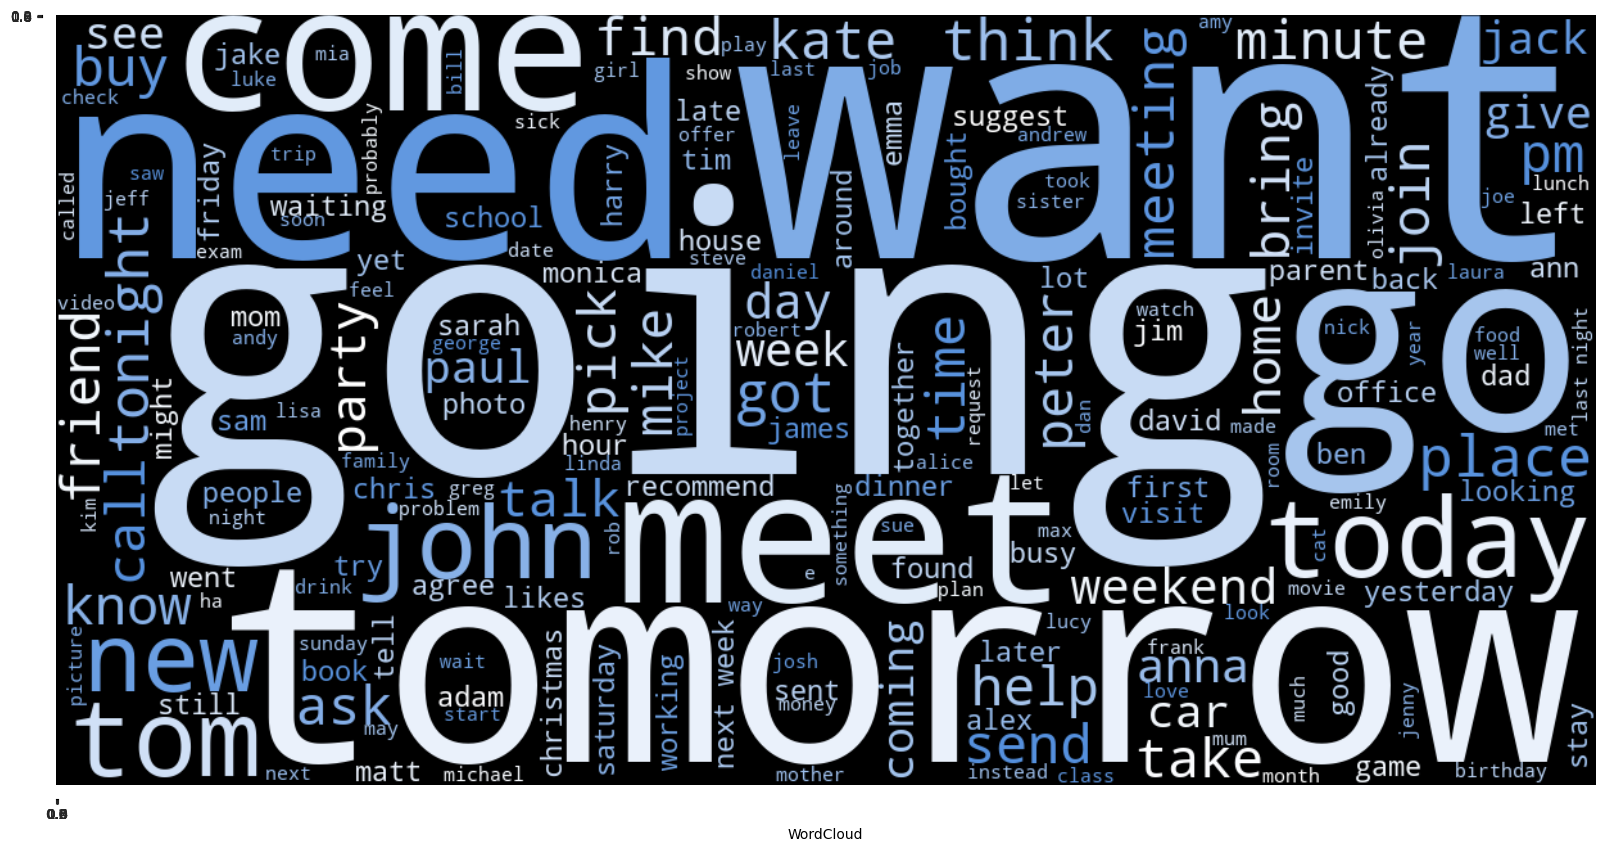

In [32]:
plot_wordcloud(' '.join(df.summary.values.tolist()), wc_blue_color_func)

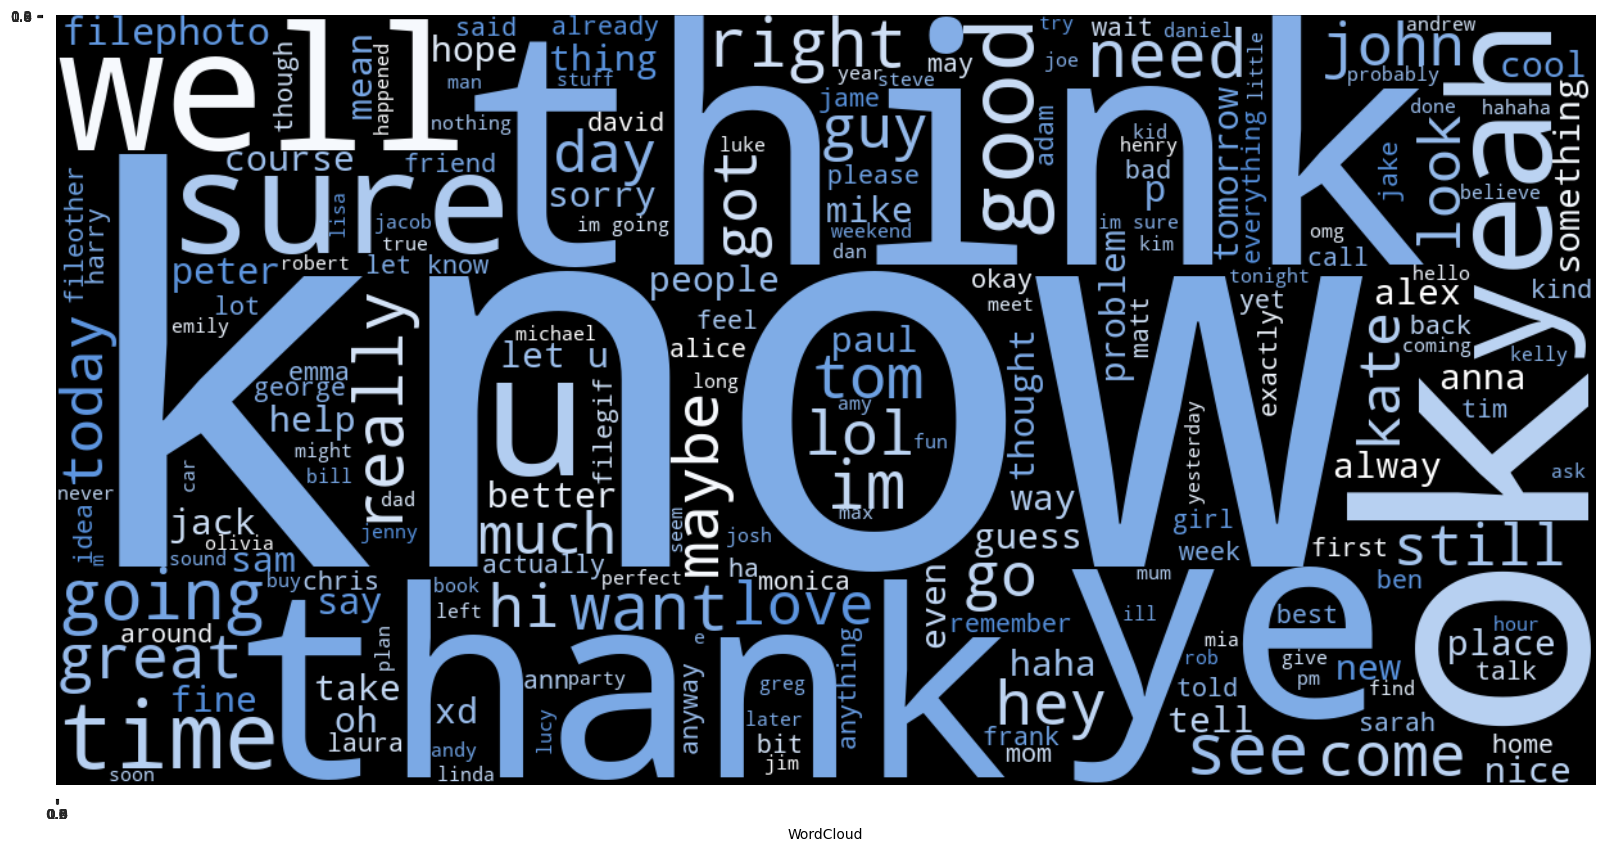

In [33]:
plot_wordcloud(' '.join(df.dialogue.values.tolist()), wc_blue_color_func)

Using a start and end tokens in headlines(summary) to let the learning algorithm know from where the headlines start's and end's.

In [20]:
start_token = 'sostok'
end_token = 'eostok'
df.summary = df.summary.apply(lambda x: f'{start_token} {x} {end_token}')


In [21]:
df.sample(5)


,id,summary,dialogue
9926,13729046,sostok conor would love go skiing place george...,george filephoto conor wow place looks awesome...
8022,13681694,sostok meg aret going shopping planning meet p...,meg hi baby aret hello meg doin aret shower me...
16012,13862234,sostok angina ill second time month upsets eostok,im sick second time month gary poor going time...
338,13864476,sostok natalia harriet lara book flight ticket...,natalia book flight gets expensive harriet yes...
4138,13612049,sostok rory wants mitch take bill sammy chip g...,rory hey mitch hope ok thinking signing bill i...


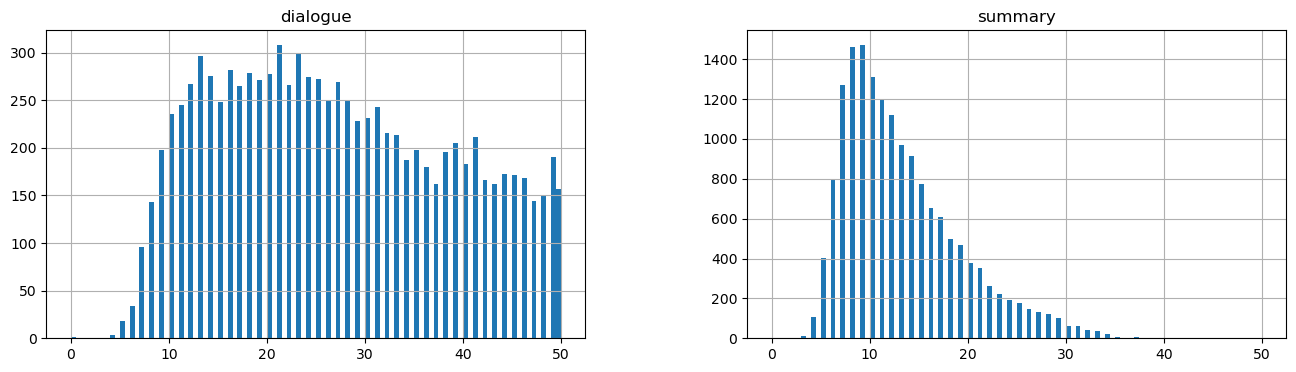

In [22]:
#Finding what should be the maximum length of text and headlines that will be feed or accepted by the learning algorithm
dialogue_count = [len(sentence.split()) for sentence in df.dialogue]
summary_count = [len(sentence.split()) for sentence in df.summary]

pd.DataFrame({'dialogue': dialogue_count, 'summary': summary_count}).hist(bins=100, figsize=(16, 4), range=[0, 50])
plt.show()


In [23]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of summary have 0-13 words
print(get_word_percent(df.summary, 13))

# Check how many % of dialogue have 0-42 words
print(get_word_percent(df.dialogue, 42))


0.62
0.52


In [24]:
max_dialogue_len = 45
max_summary_len = 15


In [25]:
# select the summary and text between their defined max lens respectively
def trim_dialogue_and_summary(df, max_dialogue_len, max_summary_len):
    cleaned_dialogue = np.array(df['dialogue'])
    cleaned_summary = np.array(df['summary'])

    short_dialogue = []
    short_summary = []

    for i in range(len(cleaned_dialogue)):
        # Check if the values in the column are strings before using split
        if isinstance(cleaned_dialogue[i], str) and isinstance(cleaned_summary[i], str):
            if len(cleaned_dialogue[i].split()) <= max_dialogue_len and len(cleaned_summary[i].split()) <= max_summary_len:
                short_dialogue.append(cleaned_dialogue[i])
                short_summary.append(cleaned_summary[i])

    # Create a new DataFrame with the shortened data
    df_shortened = pd.DataFrame({'dialogue': short_dialogue, 'summary': short_summary})
    return df_shortened

# Modify the original DataFrame 'df' with the shortened data
df = trim_dialogue_and_summary(df, max_dialogue_len, max_summary_len)




In [26]:
df.head()

,dialogue,summary
0,alice barrys strange character gwen yes yes al...,sostok barry need stand crowd recently weird o...
1,john u seen bohemian rhapsody angie sorry john...,sostok angie seen bohemian rhapsody angie like...
2,fred sup wilma much u fred nada wilma want get...,sostok fred hungry eostok
3,dad liz lisa im friends house dad going stay n...,sostok lisas friends house sure yet coming bac...
4,barbara truly bizarre websites darwin asking b...,sostok darwin recommends torrent reddit barbar...


In [28]:
# Splitting the training and validation sets using the modified DataFrame
x_train, x_val, y_train, y_val = train_test_split(
    np.array(df['dialogue']),
    np.array(df['summary']),
    test_size=0.1,
    random_state=1,
    shuffle=True
)


In [29]:

print(f'Dataset size: {len(df)}')
df.sample(5)


Dataset size: 8190


,dialogue,summary
3728,alexa i’m standing next ruben cesar ccbb jo gu...,sostok alexa standing next ruben cesar ccbb eo...
2583,joshua fileother joshua ideas joshua approve d...,sostok joshua wants either approve delete file...
7715,mom hi betty betty hi everythings fine mom mom...,sostok mom wants betty call grandfather time t...
586,trevor news amanda yet trevor amanda bad trevo...,sostok trevor come amandas place eostok
7956,lisa hi right dan hi lisa im much better lisa ...,sostok dan much better eostok


#tokenizing x

In [30]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))


In [31]:
# else use this
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))


In [32]:
x_train

array(['hey book pm hollie hollie sure melani bit late go suits take place thx ok hollie melani right melani perfect filegif',
       'kirk seen wine holy label somewhere recently alexa bother ive bought red wine actually already opened kirk oh ok quick alexa ive waiting waiting kirk okay okay way address alexa yardley st kirk like minutes drink whole wine alexa worries four bottles total',
       'adam let us try catch pm train sarah im already platform liz able make',
       ...,
       'pauline good evening tom fix appointement pauline lacotte therapeute tom yes today pm pauline im late could see tom im already waiting room ok long would pauline minutes sorry',
       'guy ssup man lot coming rugby tomorrow guy nah parents law visiting im confined barracks sorry hear see next saturday guy yep see man',
       'hi anything know stan nothing think already spoke bank stan bank kidding right stan stan wait remember keep calm go tonight'],
      dtype=object)

In [33]:
# save tokenizer
with open('x_tokenizer', 'wb') as f:
    pickle.dump(x_tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)
    

In [34]:
# one-hot-encoding
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_dialogue_len, padding='post')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_dialogue_len, padding='post')


x_vocab_size = len(x_tokenizer.word_index) + 1


print(x_vocab_size)


13793


#Tokenizing summary(y)

In [35]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))


In [49]:
# save tokenizer
with open('y_tokenizer', 'wb') as f:
    pickle.dump(y_tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)


In [36]:
# one-hot-encoding
y_train_sequence = y_tokenizer.texts_to_sequences(y_train)
y_val_sequence = y_tokenizer.texts_to_sequences(y_val)

# padding upto max_summary_len
y_train_padded = pad_sequences(y_train_sequence, maxlen=max_summary_len, padding='post')
y_val_padded = pad_sequences(y_val_sequence, maxlen=max_summary_len, padding='post')

# if you're not using num_words parameter in Tokenizer then use this
y_vocab_size = len(y_tokenizer.word_index) + 1

print(y_vocab_size)


8930


In [37]:
# removing summary which only has sostok & eostok
def remove_indexes(summary_array):
    remove_indexes = []
    for i in range(len(summary_array)):
        count = 0
        for j in summary_array[i]:
            if j != 0:
                count += 1
        if count == 2:
            remove_indexes.append(i)
    return remove_indexes


remove_train_indexes = remove_indexes(y_train_padded)
remove_val_indexes = remove_indexes(y_val_padded)

y_train_padded = np.delete(y_train_padded, remove_train_indexes, axis=0)
x_train_padded = np.delete(x_train_padded, remove_train_indexes, axis=0)

y_val_padded = np.delete(y_val_padded, remove_val_indexes, axis=0)
x_val_padded = np.delete(x_val_padded, remove_val_indexes, axis=0)


In [38]:
x_train_padded

array([[  16,  253,   76, ...,    0,    0,    0],
       [1597,   94,  449, ..., 1954,    0,    0],
       [  90,   28,   34, ...,    0,    0,    0],
       ...,
       [ 653,   10,  259, ...,    0,    0,    0],
       [ 326, 3573,  126, ...,    0,    0,    0],
       [  25,  101,    3, ...,    0,    0,    0]])

#modelling

In [39]:
latent_dim = 240
embedding_dim = 300
num_epochs = 50


In [54]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
import zipfile

# Define the path to your ZIP file and the destination folder
zip_file_path = 'glove.6B.zip'
destination_folder = "C:/Users/Bruse/Documents/datasets"

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Replace 'path/to/destination/folder' with your desired destination folder


In [41]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.300d.txt'
    embeddings_index = {}
    
    # Specify the encoding as 'utf-8' when opening the GloVe file
    with open(path_to_glove_file, encoding='utf-8') as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)
y_embedding_matrix = get_embedding_matrix(y_tokenizer, embedding_dim, y_vocab_size)



Found 400000 word vectors.
Converted 11304 words (2488 misses)
Found 400000 word vectors.
Converted 8012 words (917 misses)


In [42]:
x_embedding_matrix[8]

array([ 6.60109967e-02,  6.78889975e-02,  2.28339992e-02, -9.73979980e-02,
        1.74909998e-02,  1.79859996e-01,  8.80149975e-02,  1.23609997e-01,
        2.06010006e-02, -1.68219995e+00,  9.33620036e-02, -6.72859997e-02,
        3.10020000e-01,  8.41810033e-02, -3.16749990e-01,  2.13300008e-02,
       -2.90309995e-01,  8.65890011e-02,  7.85899982e-02,  1.59419999e-01,
        5.03400028e-01,  2.43499994e-01,  2.61599988e-01, -3.44460011e-01,
       -5.14389992e-01,  3.28649998e-01, -4.16850019e-03, -1.26870006e-01,
        7.32900016e-03, -3.35619986e-01,  8.41040015e-02,  1.01389997e-01,
       -3.31719995e-01, -2.97109991e-01, -1.36029994e+00,  3.45030010e-01,
       -2.86080003e-01, -2.07189992e-02,  7.17009977e-02, -7.86430016e-02,
       -7.05469996e-02, -4.25579995e-01,  4.38230000e-02, -1.00840002e-01,
       -8.04999992e-02,  1.22900002e-01,  1.89229995e-01, -4.12819982e-02,
        1.05529996e-02,  5.33859991e-02, -6.19530007e-02, -2.15269998e-01,
       -1.24490000e-01, -

In [43]:
print(x_embedding_matrix.shape)
print(y_embedding_matrix.shape)

(13793, 300)
(8930, 300)


Here there 3 different training models:


> build_seq2seq_model_with_just_lstm - Seq2Seq model with just LSTMs. Both encoder and decoder have just LSTMs.

> build_seq2seq_model_with_bidirectional_lstm - Seq2Seq model with Bidirectional LSTMs. Both encoder and decoder have Bidirectional LSTMs.

> build_hybrid_seq2seq_model - Seq2Seq model with hybrid architecture. Here encoder has Bidirectional LSTMs while decoder has just LSTMs.



#build_seq2seq_model_with_just_lstm

In [44]:
import tensorflow as tf

def build_seq2seq_model_with_just_lstm(
    embedding_dim, latent_dim, max_text_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
):

    # Encoder

    encoder_input = tf.keras.layers.Input(shape=(max_text_len, ))

    # encoder embedding layer
    encoder_embedding = tf.keras.layers.Embedding(
        x_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
        trainable=False
    )(encoder_input)

    # encoder lstm 1
    encoder_lstm1 = tf.keras.layers.LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4,
        recurrent_dropout=0.4
    )
    encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embedding)

    # encoder lstm 2
    encoder_lstm2 = tf.keras.layers.LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4,
        recurrent_dropout=0.4
    )
    encoder_output, *encoder_final_states = encoder_lstm2(encoder_output1)



    # Set up the decoder, using `encoder_states` as initial state.

    decoder_input = tf.keras.layers.Input(shape=(None, ))

    # decoder embedding layer
    decoder_embedding_layer = tf.keras.layers.Embedding(
        y_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
        trainable=True
    )
    decoder_embedding = decoder_embedding_layer(decoder_input)

    # decoder lstm 1
    decoder_lstm = tf.keras.layers.LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4,
        recurrent_dropout=0.4
    )
    decoder_output, *decoder_final_states = decoder_lstm(
        decoder_embedding, initial_state=encoder_final_states
    )

    # dense layer
    decoder_dense = tf.keras.layers.TimeDistributed(
        tf.keras.layers.Dense(y_vocab_size, activation='softmax')
    )
    decoder_output = decoder_dense(decoder_output)

    # Model
    model = tf.keras.models.Model([encoder_input, decoder_input], decoder_output)
    model.summary()

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return {
        'model': model,
        'inputs': {
            'encoder': encoder_input,
            'decoder': decoder_input
        },
        'outputs': {
            'encoder': encoder_output,
            'decoder': decoder_output
        },
        'states': {
            'encoder': encoder_final_states,
            'decoder': decoder_final_states
        },
        'layers': {
            'decoder': {
                'embedding': decoder_embedding_layer,
                'last_decoder_lstm': decoder_lstm,
                'dense': decoder_dense
            }
        }
    }


In [45]:
seq2seq = build_seq2seq_model_with_just_lstm(
    embedding_dim, latent_dim, max_dialogue_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 45)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 45, 300)              4137900   ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 45, 240),            519360    ['embedding[0][0]']           
                              (None, 240),                                                    

In [46]:
#If you want to change model then just change the function name above.
model = seq2seq['model']

encoder_input = seq2seq['inputs']['encoder']
decoder_input = seq2seq['inputs']['decoder']

encoder_output = seq2seq['outputs']['encoder']
decoder_output = seq2seq['outputs']['decoder']

encoder_final_states = seq2seq['states']['encoder']
decoder_final_states = seq2seq['states']['decoder']

decoder_embedding_layer = seq2seq['layers']['decoder']['embedding']
last_decoder_lstm = seq2seq['layers']['decoder']['last_decoder_lstm']
decoder_dense = seq2seq['layers']['decoder']['dense']


In [47]:
model.layers[-2].input

[<KerasTensor: shape=(None, None, 300) dtype=float32 (created by layer 'embedding_1')>,
 <KerasTensor: shape=(None, 240) dtype=float32 (created by layer 'lstm_1')>,
 <KerasTensor: shape=(None, 240) dtype=float32 (created by layer 'lstm_1')>]

In [48]:
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.000001, verbose=1),
]


In [49]:
# Compile your model as before
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [71]:
# Train your model
history = model.fit(
    [x_train_padded, y_train_padded[:, :-1]],
    y_train_padded.reshape(y_train_padded.shape[0], y_train_padded.shape[1], 1)[:, 1:],
    epochs=num_epochs,
    batch_size=128,  # Adjust batch size as needed
    callbacks=callbacks,
    validation_data=(
        [x_val_padded, y_val_padded[:, :-1]],
        y_val_padded.reshape(y_val_padded.shape[0], y_val_padded.shape[1], 1)[:, 1:]
    )
)


Epoch 1/50
58/58 [==============================] - 166s 3s/step - loss: 5.4622 - accuracy: 0.3966 - val_loss: 4.0170 - val_accuracy: 0.4625 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 193s 3s/step - loss: 4.4761 - accuracy: 0.4337 - val_loss: 3.8190 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 206s 4s/step - loss: 4.2965 - accuracy: 0.4732 - val_loss: 3.6793 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 209s 4s/step - loss: 4.2261 - accuracy: 0.4782 - val_loss: 3.6543 - val_accuracy: 0.5372 - lr: 0.0010
Epoch 5/50
58/58 [==============================] - 207s 4s/step - loss: 4.1908 - accuracy: 0.4793 - val_loss: 3.6302 - val_accuracy: 0.5378 - lr: 0.0010
Epoch 6/50
58/58 [==============================] - 207s 4s/step - loss: 4.1632 - accuracy: 0.4797 - val_loss: 3.6161 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 7/50
58/58 [==============================] - 210s 4s/step - loss: 4.1

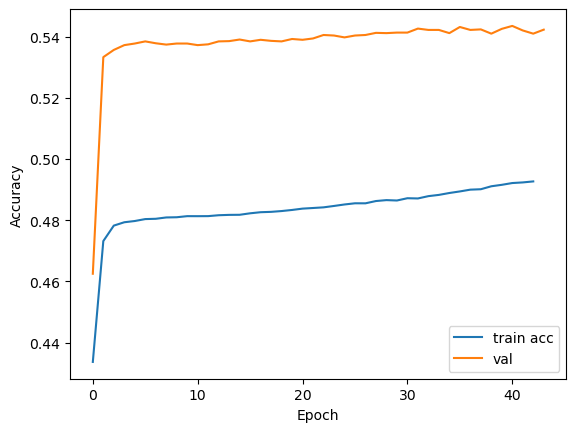

In [72]:
# Accuracy
plt.plot(history.history['accuracy'][1:], label='train acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

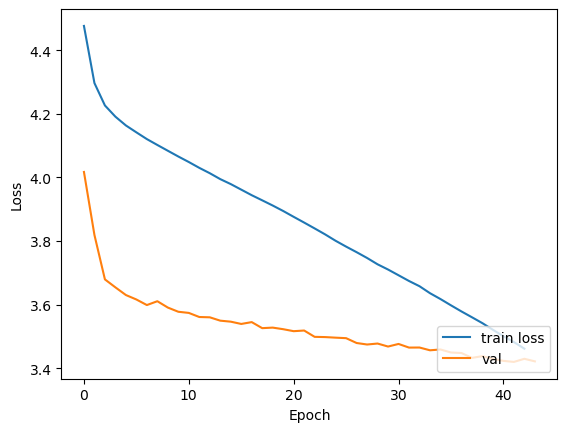

In [73]:
# Loss
plt.plot(history.history['loss'][1:], label='train loss')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

##inference

In [50]:
# Next, let’s build the dictionary to convert the index to word for target and source vocabulary:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [51]:
def build_seq2seq_model_with_just_lstm_inference(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_lstm
):
    # Encode the input sequence to get the feature vector
    encoder_model = Model(
        inputs=encoder_input, outputs=[encoder_output] + encoder_final_states
    )

    # Decoder setup
    # Below tensors will hold the states of the previous time step
    decoder_state_input_h = Input(shape=(latent_dim, ))
    decoder_state_input_c = Input(shape=(latent_dim, ))
    decoder_hidden_state_input = Input(shape=(max_dialogue_len, latent_dim))

    # Get the embeddings of the decoder sequence
    decoder_embedding = decoder_embedding_layer(decoder_input)

    # To predict the next word in the sequence, set the initial
    # states to the states from the previous time step
    decoder_output, *decoder_states = last_decoder_lstm(
        decoder_embedding,
        initial_state=[decoder_state_input_h, decoder_state_input_c]
    )

    # A dense softmax layer to generate prob dist. over the target vocabulary
    decoder_output = decoder_dense(decoder_output)

    # Final decoder model
    decoder_model = Model(
        [decoder_input] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
        [decoder_output] + decoder_states
    )

    return (encoder_model, decoder_model)


In [52]:
encoder_model, decoder_model = build_seq2seq_model_with_just_lstm_inference(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_lstm
)


In [77]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 embedding (Embedding)       (None, 45, 300)           4125000   
                                                                 
 lstm (LSTM)                 [(None, 45, 240),         519360    
                              (None, 240),                       
                              (None, 240)]                       
                                                                 
 lstm_1 (LSTM)               [(None, 45, 240),         461760    
                              (None, 240),                       
                              (None, 240)]                       
                                                                 
Total params: 5106120 (19.48 MB)
Trainable params: 981120 (

In [78]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 300)            2681100   ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 240)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 240)]                0         []                            
                                                                                            

In [53]:
#Converting from sequence to text for model with just LSTM's
def decode_sequence_seq2seq_model_with_just_lstm(
    input_sequence, encoder_model, decoder_model
):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_sequence)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + [e_out, e_h, e_c]
        )

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


In [54]:
def seq2summary(input_sequence):
    new_string = ''
    for i in input_sequence:
        if (
            (i != 0 and i != target_word_index[start_token]) and
            (i != target_word_index[end_token])
        ):
            new_string = new_string + reverse_target_word_index[i] + ' '
    return new_string


In [55]:
def seq2text(input_sequence):
    new_string = ''
    for i in input_sequence:
        if i != 0:
            new_string = new_string + reverse_source_word_index[i] + ' '
    return new_string


In [56]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

if len(l) % 3 != 0:
    while len(l) % 3 != 0:
        l.append(0)
print(l)

lst_i = 3
for i in range(0, len(l), 3):
    print(l[i:i + lst_i])

print(' '.join(['', 'james', 'ethan', '', 'tony']))
print(' '.join(' '.join(['', 'james', 'ethan', '', 'tony']).split()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0]
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[10, 0, 0]
 james ethan  tony
james ethan tony


In [57]:
#For predicting unseen data pass decode_sequence function for which you want to decode
def predict_text(text, decode_sequence, encoder_model, decoder_model):
    original_text = text
    text = clean_text([text])  # generator
    text_list = original_text.split()

    if len(text_list) <= max_dialogue_len:
        text = expand_contractions(text)
        text = clean_text(text)
        text = f'_START_ {text} _END_'
        text = f'{start_token} {text} {end_token}'

        seq = x_tokenizer.texts_to_sequences([' '.join(text_list)])
        padded = pad_sequences(seq, maxlen=max_dialogue_len, padding='post')
        pred_summary = decode_sequence(
            padded.reshape(1, max_dialogue_len), encoder_model, decoder_model
        )
        return pred_summary
    else:
        pred_summary = ''

        # breaking long texts to individual max_text_len texts and predicting on them
        while len(text_list) % max_dialogue_len == 0:
            text_list.append('')

        lst_i = max_dialogue_len
        for i in range(0, len(text_list), max_dialogue_len):
            _text_list = original_text.split()[i:i + lst_i]
            _text = ' '.join(_text_list)
            _text = ' '.join(
                _text.split()
            )  # to remove spaces that were added to make len(text_list) % max_text_len == 0

            _text = expand_contractions(_text)
            _text = clean_text(_text)  # generator
            _text = f'_START_ {_text} _END_'
            _text = f'{start_token} {_text} {end_token}'
            # print(_text, '\n')

            _seq = x_tokenizer.texts_to_sequences([_text])
            _padded = pad_sequences(_seq, maxlen=max_dialogue_len, padding='post')
            _pred = decode_sequence(
                _padded.reshape(1, max_dialogue_len), encoder_model, decoder_model
            )
            pred_summary += ' ' + ' '.join(_pred.split()[1:-2])
            pred_summary = ' '.join(pred_summary.split())

        return pred_summary
    

Prediction

In [84]:
# Testing on training data
for i in range(0, 15):
    print(f"# {i+1} Dialogue: ", seq2text(x_train_padded[i]))
    print("Original summary: ", seq2summary(y_train_padded[i]))
    print(
        "Predicted summary: ",
        decode_sequence_seq2seq_model_with_just_lstm(
            x_train_padded[i].reshape(1, max_dialogue_len), encoder_model,
            decoder_model
        )
    )
    print()
    

# 1 Dialogue:  kate tilda town tilda already thought would pm kate took early bus worries walk eat something restaurant ate last time tilda ok soon im done ill join kate great 
Original summary:  kate town tilda thought would pm walk eat something tilda join soon free 
1/1 [==============================] - 0s 43ms/step
Predicted summary:   tom late meeting tomorrow

# 2 Dialogue:  michael sorry cannot make today tom well ok sure michael im really sorry cannot leave office pm tom okay call tomorrow michael sorry 
Original summary:  michael cannot leave office pm unable meet tom michael call tom tomorrow 
1/1 [==============================] - 0s 47ms/step
Predicted summary:   tom going meet tomorrow pm

# 3 Dialogue:  poppy cat seems sad george cannot seem sad cats facial expressions poppy mean sleeps hides george eating poppy nope george get thee vet stat 
Original summary:  poppys cat eating probably take vet 
1/1 [==============================] - 0s 38ms/step
Predicted summary:   m

In [85]:
# Testing on validation data
for i in range(0, 15):
    print(f"# {i+1} dialogue: ", seq2text(x_val_padded[i]))
    print("Original summary: ", seq2summary(y_val_padded[i]))
    print(
        "Predicted summary: ",
        decode_sequence_seq2seq_model_with_just_lstm(
            x_val_padded[i].reshape(1, max_dialogue_len), encoder_model,
            decoder_model
        )
    )
    print()
    

# 1 dialogue:  adam angry abigail adam really abigail angry sad adam abigail even know adam oh cmon talk mean make sad abigail completely plans opinion adam plans opinions abigail oh god seriously talk 
Original summary:  abigail angry adam talk 
1/1 [==============================] - 0s 70ms/step
Predicted summary:   alex going watch movie tonight

# 2 dialogue:  frederic weather sean today sunny cold vanessa quite strange temperature low seems quite hot sun abigail love weather single cloud frederic frederic seen sun weeks depressing sean edinburgh difficult know 
Original summary:  frederic sean vanessa abigail discussing weather 
1/1 [==============================] - 0s 40ms/step
Predicted summary:   mia bought new dress dress dress

# 3 dialogue:  hope get job josie oh im sorry hope hope life sucks josie think like josie may tough good things come josie project thoughts world josie good things hope ok try hope hurt guess josie keep crossed time josie maybe job reason 
Original su

#Bidirectional seq2seq LSTM

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, TimeDistributed
from tensorflow.keras.models import Model

def build_seq2seq_model_with_bidirectional_lstm(
    embedding_dim, latent_dim, max_dialogue_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
):

    #  Encoder

    encoder_input = Input(shape=(max_dialogue_len, ))

    # encoder embedding layer
    encoder_embedding = Embedding(
        x_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
        trainable=False,
        name='encoder_embedding'
    )(encoder_input)

    # encoder lstm1
    encoder_bi_lstm1 = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.4,
            name='encoder_lstm_1'
        ),
        name='encoder_bidirectional_lstm_1'
    )
    encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_bi_lstm1(
        encoder_embedding
    )
    encoder_bi_lstm1_output = [
        encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1
    ]

    # encoder lstm 2
    encoder_bi_lstm2 = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.4,
            name='encoder_lstm_2'
        ),
        name='encoder_bidirectional_lstm_2'
    )
    encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_bi_lstm2(
        encoder_output1
    )
    encoder_bi_lstm2_output = [
        encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2
    ]

    # encoder lstm 3
    encoder_bi_lstm = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.4,
            name='encoder_lstm_3'
        ),
        name='encoder_bidirectional_lstm_3'
    )
    encoder_output, *encoder_final_states = encoder_bi_lstm(encoder_output2)


    #  Decoder


    # Set up the decoder, using `encoder_states` as initial state.

    decoder_input = Input(shape=(None, ))

    # decoder embedding layer
    decoder_embedding_layer = Embedding(
        y_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
        trainable=False,
        name='decoder_embedding'
    )
    decoder_embedding = decoder_embedding_layer(decoder_input)

    decoder_bi_lstm = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.2,
            name='decoder_lstm_1'
        ),
        name='decoder_bidirectional_lstm_1'
    )
    decoder_output, *decoder_final_states = decoder_bi_lstm(
        decoder_embedding, initial_state=encoder_final_states
        # decoder_embedding, initial_state=encoder_final_states[:2]
    )  # taking only the forward states

    # dense layer
    decoder_dense = TimeDistributed(
        Dense(y_vocab_size, activation='softmax')
    )
    decoder_output = decoder_dense(decoder_output)


    #  Model

    model = Model([encoder_input, decoder_input], decoder_output, name='seq2seq_model_with_bidirectional_lstm')
    model.summary()

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return {
        'model': model,
        'inputs': {
            'encoder': encoder_input,
            'decoder': decoder_input
        },
        'outputs': {
            'encoder': encoder_output,
            'decoder': decoder_output
        },
        'states': {
            'encoder': encoder_final_states,
            'decoder': decoder_final_states
        },
        'layers': {
            'decoder': {
                'embedding': decoder_embedding_layer,
                'last_decoder_lstm': decoder_bi_lstm,
                'dense': decoder_dense
            }
        }
    }


In [63]:
def build_seq2seq_model_with_bidirectional_lstm_inference(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_bi_lstm
):

    # Encode the input sequence to get the feature vector
    encoder_model = Model(
        inputs=encoder_input, outputs=[encoder_output] + encoder_final_states
    )

    # Decoder setup
    # Below tensors will hold the states of the previous time step
    decoder_state_forward_input_h = Input(shape=(latent_dim, ))
    decoder_state_forward_input_c = Input(shape=(latent_dim, ))
    decoder_state_backward_input_h = Input(shape=(latent_dim, ))
    decoder_state_backward_input_c = Input(shape=(latent_dim, ))

    # Create the hidden input layer with twice the latent dimension,
    # since we are using bi - directional LSTM's we will get
    # two hidden states and two cell states
    decoder_hidden_state_input = Input(shape=(max_dialogue_len, latent_dim * 2))

    decoder_initial_state = [
        decoder_state_forward_input_h, decoder_state_forward_input_c,
        decoder_state_backward_input_h, decoder_state_backward_input_c
    ]

    # Get the embeddings of the decoder sequence
    decoder_embedding = decoder_embedding_layer(decoder_input)

    # To predict the next word in the sequence, set the initial
    # states to the states from the previous time step
    decoder_output, *decoder_states = last_decoder_bi_lstm(
        decoder_embedding, initial_state=decoder_initial_state
    )

    # A dense softmax layer to generate prob dist. over the target vocabulary
    decoder_output = decoder_dense(decoder_output)

    # Final decoder model
    decoder_model = Model(
        [decoder_input] + [decoder_hidden_state_input] + decoder_initial_state,
        [decoder_output] + decoder_states
    )

    return (encoder_model, decoder_model)

In [64]:
def decode_sequence_seq2seq_model_with_bidirectional_lstm(
    input_sequence, encoder_model, decoder_model
):
    # Encode the input as state vectors.
    e_out, *state_values = encoder_model.predict(input_sequence)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict(
            [target_seq] + [e_out] + state_values
        )

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) # Greedy Search
        sampled_token = reverse_target_word_index[sampled_token_index + 1]

        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence

In [65]:
models_info = {
    'just_lstm': {
        'model': build_seq2seq_model_with_just_lstm,
        'inference': build_seq2seq_model_with_just_lstm_inference,
        'decode_sequence': decode_sequence_seq2seq_model_with_just_lstm
    },
    'bidirectional_lstm': {
        'model': build_seq2seq_model_with_bidirectional_lstm,
        'inference': build_seq2seq_model_with_bidirectional_lstm_inference,
        'decode_sequence': decode_sequence_seq2seq_model_with_bidirectional_lstm
    },
    }

In [66]:
model_func = models_info['bidirectional_lstm']['model']
inference_func = models_info['bidirectional_lstm']['inference']
decode_sequence_func = models_info['bidirectional_lstm']['decode_sequence']

In [91]:
seq2seq = model_func(
    embedding_dim, latent_dim, max_dialogue_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
)

model = seq2seq['model']

encoder_input = seq2seq['inputs']['encoder']
decoder_input = seq2seq['inputs']['decoder']

encoder_output = seq2seq['outputs']['encoder']
decoder_output = seq2seq['outputs']['decoder']

encoder_final_states = seq2seq['states']['encoder']
decoder_final_states = seq2seq['states']['decoder']

decoder_embedding_layer = seq2seq['layers']['decoder']['embedding']
last_decoder_lstm = seq2seq['layers']['decoder']['last_decoder_lstm']
decoder_dense = seq2seq['layers']['decoder']['dense']

model.summary()

Model: "seq2seq_model_with_bidirectional_lstm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 45)]                 0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 45, 300)              4125000   ['input_6[0][0]']             
 ng)                                                                                              
                                                                                                  
 encoder_bidirectional_lstm  [(None, 45, 480),            1038720   ['encoder_embedding[0][0]']   
 _1 (Bidirectional)           (None, 240),                                                        
                              (None, 240),                    

In [92]:
history = model.fit(
    [x_train_padded, y_train_padded[:, :-1]],
    y_train_padded[:, 1:],  # Shift the target sequences by one step
    epochs=num_epochs,
    batch_size=128,
    callbacks=callbacks,
    validation_data=(
        [x_val_padded, y_val_padded[:, :-1]],
        y_val_padded[:, 1:]
    )
)


Epoch 1/50
58/58 [==============================] - 1417s 24s/step - loss: 5.1391 - accuracy: 0.4056 - val_loss: 3.8283 - val_accuracy: 0.4782 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 1697s 29s/step - loss: 4.3088 - accuracy: 0.4506 - val_loss: 3.6211 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 1754s 30s/step - loss: 4.1071 - accuracy: 0.4719 - val_loss: 3.4518 - val_accuracy: 0.5390 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 1779s 31s/step - loss: 3.9399 - accuracy: 0.4852 - val_loss: 3.2957 - val_accuracy: 0.5549 - lr: 0.0010
Epoch 5/50
58/58 [==============================] - 1949s 34s/step - loss: 3.7697 - accuracy: 0.4995 - val_loss: 3.1434 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 6/50
58/58 [==============================] - 2287s 39s/step - loss: 3.6003 - accuracy: 0.5138 - val_loss: 2.9893 - val_accuracy: 0.5851 - lr: 0.0010
Epoch 7/50
58/58 [==============================] - 2062s 36s/st

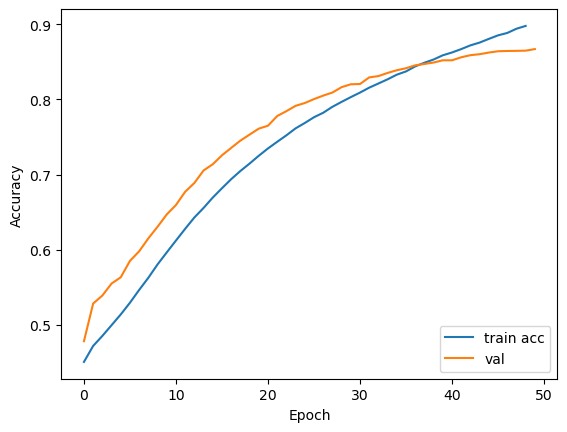

In [93]:
# Accuracy
plt.plot(history.history['accuracy'][1:], label='train acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

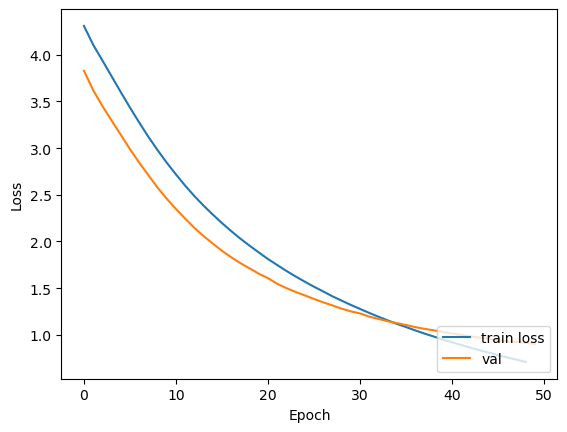

In [94]:
# Loss
plt.plot(history.history['loss'][1:], label='train loss')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [95]:
# Inference
encoder_model, decoder_model = inference_func(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_lstm
)

In [96]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 45)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 45, 300)           4125000   
 ng)                                                             
                                                                 
 encoder_bidirectional_lstm  [(None, 45, 480),         1038720   
 _1 (Bidirectional)           (None, 240),                       
                              (None, 240),                       
                              (None, 240),                       
                              (None, 240)]                       
                                                                 
 encoder_bidirectional_lstm  [(None, 45, 480),         1384320   
 _2 (Bidirectional)           (None, 240),                 

In [97]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            2681100   ['input_7[0][0]']             
 ng)                                                                                              
                                                                                                  
 input_8 (InputLayer)        [(None, 240)]                0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 240)]                0         []                      

In [98]:
# Testing on training data
for i in range(0, 10):
    print(f"# {i+1} News: ", seq2text(x_train_padded[i]))
    print("Original summary: ", seq2summary(y_train_padded[i]))
    print(
        "Predicted summary: ",
        decode_sequence_func(
            x_train_padded[i].reshape(1, max_dialogue_len), encoder_model,
            decoder_model
        )
    )
    print()

# 1 News:  kate tilda town tilda already thought would pm kate took early bus worries walk eat something restaurant ate last time tilda ok soon im done ill join kate great 
Original summary:  kate town tilda thought would pm walk eat something tilda join soon free 
1/1 [==============================] - 0s 71ms/step
Predicted summary:   going sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok

# 2 News:  michael sorry cannot make today tom well ok sure michael im really sorry cannot leave office pm tom okay call tomorrow michael sorry 
Original summary:  michael cannot leave office pm unable meet tom michael call tom tomorrow 
1/1 [==============================] - 0s 41ms/step
Predicted summary:   going sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok sostok

# 3 News:  poppy cat seems sad george cannot seem sad cats facial expressions poppy mean sleeps hides george eating poppy nope george get thee vet stat 
O

#SEQ2SEQ HYBRID BIDIRECTIONAL LSTM

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, TimeDistributed
from tensorflow.keras.models import Model

def build_hybrid_seq2seq_model(
    embedding_dim, latent_dim, max_dialogue_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
):


    #  Encoder

    encoder_input = Input(shape=(max_dialogue_len, ))

    # encoder embedding layer
    encoder_embedding = Embedding(
        x_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
        trainable=False,
        name='encoder_embedding'
    )(encoder_input)

    # encoder lstm1
    encoder_bi_lstm1 = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4, recurrent_dropout=0.4,
            name='encoder_lstm_1'
        ),
        name='encoder_bidirectional_lstm_1'
    )
    encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_bi_lstm1(
        encoder_embedding
    )
    encoder_bi_lstm1_output = [
        encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1
    ]

    # encoder lstm 2
    encoder_bi_lstm2 = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.4,
            name='encoder_lstm_2'
        ),
        name='encoder_bidirectional_lstm_2'
    )
    encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_bi_lstm2(
        encoder_output1
    )
    encoder_bi_lstm2_output = [
        encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2
    ]

    # encoder lstm 3
    encoder_bi_lstm = Bidirectional(
        LSTM(
            latent_dim,
            return_sequences=True,
            return_state=True,
            dropout=0.4,
            recurrent_dropout=0.4,
            name='encoder_lstm_3'
        ),
        name='encoder_bidirectional_lstm_3'
    )
    encoder_output, *encoder_final_states = encoder_bi_lstm(encoder_output2)


    #  Decoder

    # Set up the decoder, using `encoder_states` as initial state.

    decoder_input = Input(shape=(None, ))

    # decoder embedding layer
    decoder_embedding_layer = Embedding(
        y_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
        trainable=False,
        name='decoder_embedding'
    )
    decoder_embedding = decoder_embedding_layer(decoder_input)

    decoder_lstm = LSTM(
        latent_dim,
        return_sequences=True,
        return_state=True,
        dropout=0.4,
        recurrent_dropout=0.2,
        name='decoder_lstm_1'
    )
    decoder_output, *decoder_final_states = decoder_lstm(
        decoder_embedding, initial_state=encoder_final_states[:2]
    )  # taking only the forward states

    # dense layer
    decoder_dense = TimeDistributed(
        Dense(y_vocab_size, activation='softmax')
    )
    decoder_output = decoder_dense(decoder_output)

    #  Model

    model = Model([encoder_input, decoder_input], decoder_output, name='seq2seq_model_with_bidirectional_lstm')
    model.summary()

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return {
        'model': model,
        'inputs': {
            'encoder': encoder_input,
            'decoder': decoder_input
        },
        'outputs': {
            'encoder': encoder_output,
            'decoder': decoder_output
        },
        'states': {
            'encoder': encoder_final_states,
            'decoder': decoder_final_states
        },
        'layers': {
            'decoder': {
                'embedding': decoder_embedding_layer,
                'last_decoder_lstm': decoder_lstm,
                'dense': decoder_dense
            }
        }
    }


In [59]:
def build_hybrid_seq2seq_model_inference(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_bi_lstm
):

    # Encode the input sequence to get the feature vector
    encoder_model = Model(
        inputs=encoder_input, outputs=[encoder_output] + encoder_final_states
    )

    # Decoder setup
    # Below tensors will hold the states of the previous time step
    decoder_state_forward_input_h = Input(shape=(latent_dim, ))
    decoder_state_forward_input_c = Input(shape=(latent_dim, ))
    # decoder_state_backward_input_h = Input(shape=(latent_dim, ))
    # decoder_state_backward_input_c = Input(shape=(latent_dim, ))

    # Create the hidden input layer with twice the latent dimension,
    # since we are using bi - directional LSTM's we will get
    # two hidden states and two cell states
    decoder_hidden_state_input = Input(shape=(max_dialogue_len, latent_dim * 2))

    decoder_initial_state = [
        decoder_state_forward_input_h, decoder_state_forward_input_c,
        #decoder_state_backward_input_h, decoder_state_backward_input_c
    ]

    # Get the embeddings of the decoder sequence
    decoder_embedding = decoder_embedding_layer(decoder_input)

    # To predict the next word in the sequence, set the initial
    # states to the states from the previous time step
    decoder_output, *decoder_states = last_decoder_bi_lstm(
        decoder_embedding, initial_state=decoder_initial_state
    )

    # A dense softmax layer to generate prob dist. over the target vocabulary
    decoder_output = decoder_dense(decoder_output)

    # Final decoder model
    decoder_model = Model(
        [decoder_input] + [decoder_hidden_state_input] + decoder_initial_state,
        [decoder_output] + decoder_states
    )

    return (encoder_model, decoder_model)


In [60]:
def decode_sequence_hybrid_seq2seq_model(
    input_sequence, encoder_model, decoder_model
):
    # Encode the input as state vectors.
    e_out, *state_values = encoder_model.predict(input_sequence)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index[start_token]

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, *decoder_states = decoder_model.predict(
            [target_seq] + [e_out] + state_values[:2]
        )

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) # Greedy Search
        sampled_token = reverse_target_word_index[sampled_token_index + 1]

        if sampled_token != end_token:
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == end_token) or (len(decoded_sentence.split()) >= (max_summary_len - 1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        state_values = decoder_states

    return decoded_sentence


In [67]:
models_info = {
    'just_lstm': {
        'model': build_seq2seq_model_with_just_lstm,
        'inference': build_seq2seq_model_with_just_lstm_inference,
        'decode_sequence': decode_sequence_seq2seq_model_with_just_lstm
    },
    'bidirectional_lstm': {
        'model': build_seq2seq_model_with_bidirectional_lstm,
        'inference': build_seq2seq_model_with_bidirectional_lstm_inference,
        'decode_sequence': decode_sequence_seq2seq_model_with_bidirectional_lstm
    },
    'hybrid_model': {
        'model': build_hybrid_seq2seq_model,
        'inference': build_hybrid_seq2seq_model_inference,
        'decode_sequence': decode_sequence_hybrid_seq2seq_model
    }
}


In [68]:
model_func = models_info['hybrid_model']['model']
inference_func = models_info['hybrid_model']['inference']
decode_sequence_func = models_info['hybrid_model']['decode_sequence']


In [69]:
seq2seq = model_func(
    embedding_dim, latent_dim, max_dialogue_len,
    x_vocab_size, y_vocab_size,
    x_embedding_matrix, y_embedding_matrix
)

model = seq2seq['model']

encoder_input = seq2seq['inputs']['encoder']
decoder_input = seq2seq['inputs']['decoder']

encoder_output = seq2seq['outputs']['encoder']
decoder_output = seq2seq['outputs']['decoder']

encoder_final_states = seq2seq['states']['encoder']

decoder_final_states = seq2seq['states']['decoder']

decoder_embedding_layer = seq2seq['layers']['decoder']['embedding']
last_decoder_lstm = seq2seq['layers']['decoder']['last_decoder_lstm']
decoder_dense = seq2seq['layers']['decoder']['dense']

model.summary()


Model: "seq2seq_model_with_bidirectional_lstm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 45)]                 0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, 45, 300)              4137900   ['input_6[0][0]']             
 ng)                                                                                              
                                                                                                  
 encoder_bidirectional_lstm  [(None, 45, 480),            1038720   ['encoder_embedding[0][0]']   
 _1 (Bidirectional)           (None, 240),                                                        
                              (None, 240),                    

In [71]:
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',  # Specify your loss function here
    metrics=['accuracy']
)


In [72]:
history = model.fit(
    [x_train_padded, y_train_padded[:, :-1]],
    y_train_padded.reshape(y_train_padded.shape[0], y_train_padded.shape[1], 1)[:, 1:],
    epochs=num_epochs,
    batch_size=128,  # You can adjust the batch size based on your CPU's capabilities
    callbacks=callbacks,
    validation_data=(
        [x_val_padded, y_val_padded[:, :-1]],
        y_val_padded.reshape(y_val_padded.shape[0], y_val_padded.shape[1], 1)[:, 1:]
    )
)


Epoch 1/50
58/58 [==============================] - 975s 16s/step - loss: 4.6623 - accuracy: 0.4113 - val_loss: 3.9967 - val_accuracy: 0.4978 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 1107s 19s/step - loss: 4.4234 - accuracy: 0.4466 - val_loss: 3.9228 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 1120s 19s/step - loss: 4.3225 - accuracy: 0.4648 - val_loss: 3.7738 - val_accuracy: 0.5230 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 1207s 21s/step - loss: 4.2639 - accuracy: 0.4698 - val_loss: 3.7447 - val_accuracy: 0.5248 - lr: 0.0010
Epoch 5/50
58/58 [==============================] - 1272s 22s/step - loss: 4.2223 - accuracy: 0.4723 - val_loss: 3.7084 - val_accuracy: 0.5242 - lr: 0.0010
Epoch 6/50
58/58 [==============================] - 1278s 22s/step - loss: 4.1936 - accuracy: 0.4740 - val_loss: 3.6959 - val_accuracy: 0.5256 - lr: 0.0010
Epoch 7/50
58/58 [==============================] - 1286s 22s/ste

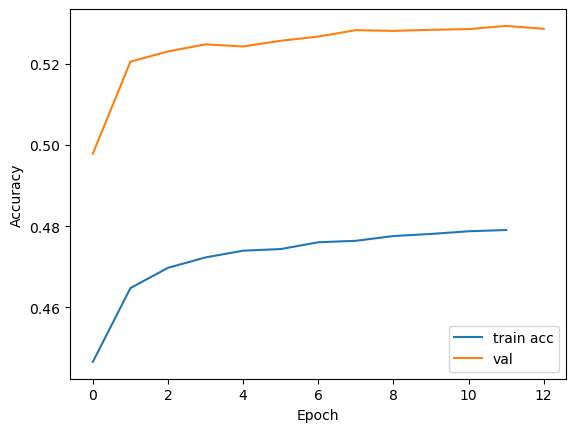

In [73]:
# Accuracy
plt.plot(history.history['accuracy'][1:], label='train acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

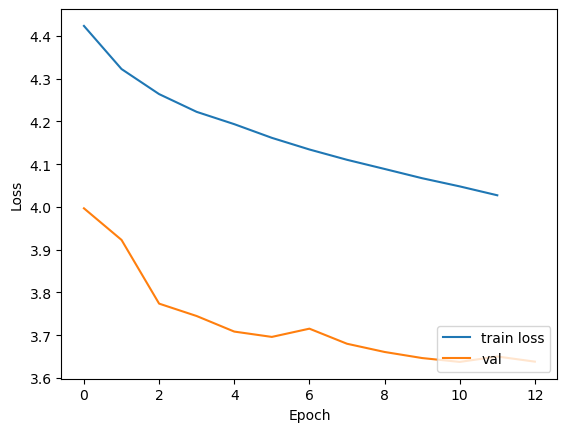

In [74]:
# Loss
plt.plot(history.history['loss'][1:], label='train loss')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [75]:
# Inference
encoder_model, decoder_model = inference_func(
    max_dialogue_len, latent_dim, encoder_input, encoder_output,
    encoder_final_states, decoder_input, decoder_output,
    decoder_embedding_layer, decoder_dense, last_decoder_lstm
)


In [76]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 45)]              0         
                                                                 
 encoder_embedding (Embeddi  (None, 45, 300)           4137900   
 ng)                                                             
                                                                 
 encoder_bidirectional_lstm  [(None, 45, 480),         1038720   
 _1 (Bidirectional)           (None, 240),                       
                              (None, 240),                       
                              (None, 240),                       
                              (None, 240)]                       
                                                                 
 encoder_bidirectional_lstm  [(None, 45, 480),         1384320   
 _2 (Bidirectional)           (None, 240),                 

In [77]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 300)            2679000   ['input_7[0][0]']             
 ng)                                                                                              
                                                                                                  
 input_8 (InputLayer)        [(None, 240)]                0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 240)]                0         []                      

In [78]:
# Testing on training data
for i in range(0, 10):
    print(f"# {i+1} News: ", seq2text(x_train_padded[i]))
    print("Original summary: ", seq2summary(y_train_padded[i]))
    print(
        "Predicted summary: ",
        decode_sequence_func(
            x_train_padded[i].reshape(1, max_dialogue_len), encoder_model,
            decoder_model
        )
    )
    print()

# 1 News:  hey book pm hollie hollie sure melani bit late go suits take place thx ok hollie melani right melani perfect filegif 
Original summary:  scheduled melani 
1/1 [==============================] - 0s 38ms/step
Predicted summary:   meeting meet tomorrow go going sostok sostok sostok sostok sostok sostok sostok sostok sostok

# 2 News:  kirk seen wine holy label somewhere recently alexa bother ive bought red wine actually already opened kirk oh ok quick alexa ive waiting waiting kirk okay okay way address alexa yardley st kirk like minutes drink whole wine alexa worries four bottles total 
Original summary:  kirk alexas place yardley st minutes alexa four wine bottles home 
1/1 [==============================] - 0s 27ms/step
Predicted summary:   want meet tomorrow tomorrow tomorrow tomorrow going sostok sostok sostok sostok sostok sostok sostok

# 3 News:  adam let us try catch pm train sarah im already platform liz able make 
Original summary:  going try catch pm train 
1/1 [===

In [ ]:
pip install rouge


In [ ]:
from rouge import Rouge


In [ ]:
# Define a function to calculate ROUGE scores
def calculate_rouge(reference, candidate):
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference)
    return scores[0]  # Assuming there's only one reference summary


In [ ]:
# Testing on training data
for i in range(0, 10):
    print(f"# {i+1} News: ", seq2text(x_train_padded[i]))
    print("Original summary: ", seq2summary(y_train_padded[i]))

    # Generate the predicted summary
    predicted_summary = decode_sequence_func(
        x_train_padded[i].reshape(1, max_dialogue_len), encoder_model, decoder_model
    )

    print("Predicted summary: ", predicted_summary)

    # Calculate ROUGE scores for this example
    reference = seq2summary(y_train_padded[i])  # Reference summary
    candidate = predicted_summary  # Predicted summary
    rouge_scores = calculate_rouge(reference, candidate)

    # Print ROUGE scores
    print("ROUGE scores:", rouge_scores)
    print()


# Transformers

In [80]:
pip install tensorflow-addons



  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/ec/52/047d768c4669db0c059109a88c21a3c71bcda957c46f13967e44b8c7fa4c/tensorflow_addons-0.22.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? e

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\nlp\Lib\socket.py", line 706, in readinto
    ret

   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- --------------- 440.3/719.8 kB 23.2 kB/s eta 0:00:13
   ----------------------- -------------

In [1]:
import tensorflow_addons as tfa


ModuleNotFoundError: No module named 'tensorflow_addons'

In [79]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, LayerNormalization, MultiHeadAttention, Dropout, TimeDistributed, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

def build_transformer_seq2seq_model(embedding_dim, latent_dim, max_dialogue_len, x_vocab_size, y_vocab_size, x_embedding_matrix, y_embedding_matrix):
    # Encoder
    encoder_input = Input(shape=(max_dialogue_len,))

    encoder_embedding = Embedding(
        x_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(x_embedding_matrix),
        trainable=False,
    )(encoder_input)

    encoder_output = encoder_embedding  # Add positional embeddings here

    # Decoder
    decoder_input = Input(shape=(None,))

    decoder_embedding = Embedding(
        y_vocab_size,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(y_embedding_matrix),
        trainable=False,
    )(decoder_input)

    decoder_output = decoder_embedding  # Add positional embeddings here

    # Transformer Encoder Layer
    num_heads = 8
    feed_forward_dim = 2048
    num_layers = 6

    for _ in range(num_layers):
        encoder_output = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim // num_heads,
            value_dim=embedding_dim // num_heads,
        )(inputs=[encoder_output, encoder_output, encoder_output])
        encoder_output = LayerNormalization(epsilon=1e-6)(encoder_output + encoder_output)  # Residual connection

        feed_forward = Dense(feed_forward_dim, activation='relu')(encoder_output)
        feed_forward = Dense(embedding_dim)(feed_forward)
        encoder_output = LayerNormalization(epsilon=1e-6)(encoder_output + feed_forward)  # Residual connection

    # Transformer Decoder Layer
    for _ in range(num_layers):
        decoder_output = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim // num_heads,
            value_dim=embedding_dim // num_heads,
        )(inputs=[decoder_output, decoder_output, decoder_output])
        decoder_output = LayerNormalization(epsilon=1e-6)(decoder_output + decoder_output)  # Residual connection

        decoder_output2 = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim // num_heads,
            value_dim=embedding_dim // num_heads,
        )(inputs=[decoder_output, encoder_output, encoder_output])
        decoder_output2 = Dropout(0.1)(decoder_output2)
        decoder_output = LayerNormalization(epsilon=1e-6)(decoder_output + decoder_output2)  # Residual connection

        feed_forward = Dense(feed_forward_dim, activation='relu')(decoder_output)
        feed_forward = Dense(embedding_dim)(feed_forward)
        decoder_output = LayerNormalization(epsilon=1e-6)(decoder_output + feed_forward)  # Residual connection

    decoder_output = GlobalAveragePooling1D()(decoder_output)  # Convert the output to a 1D sequence
    decoder_output = Dense(y_vocab_size, activation='softmax')(decoder_output)

    model = Model([encoder_input, decoder_input], decoder_output)
    model.summary()

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build and train the model as you did with the LSTM-based models
transformer_model = build_transformer_seq2seq_model(
    embedding_dim, latent_dim, max_dialogue_len, x_vocab_size, y_vocab_size, x_embedding_matrix, y_embedding_matrix
)

# Train the model
history = transformer_model.fit(
    [x_train_padded, y_train_padded[:, :-1]],
    y_train_padded[:, 1:],  # Shifted target sequence
    epochs=num_epochs,
    batch_size=128,  # Adjust batch size as needed
    callbacks=callbacks,
    validation_data=([x_val_padded, y_val_padded[:, :-1]], y_val_padded[:, 1:])
)


ModuleNotFoundError: No module named 'tensorflow_addons'